<a href="https://colab.research.google.com/github/fendiirfan/ML_forMarketing/blob/main/ML_for_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

customerID: Customer ID



gender: Whether the customer is a male or a female



SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)



Partner: Whether the customer has a partner or not (Yes, No)



Dependents: Whether the customer has dependents or not (Yes, No)



tenure: Number of months the customer has stayed with the company



PhoneService: Whether the customer has a phone service or not (Yes, No)



MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)



InternetService: Customer’s internet service provider (DSL, Fiber optic, No)



OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)



OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)



DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)



TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)



StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)



StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)



Contract: The contract term of the customer (Month-to-month, One year, Two year)



PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)



PaymentMethodThe: customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))



MonthlyCharges: The amount charged to the customer monthly



TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

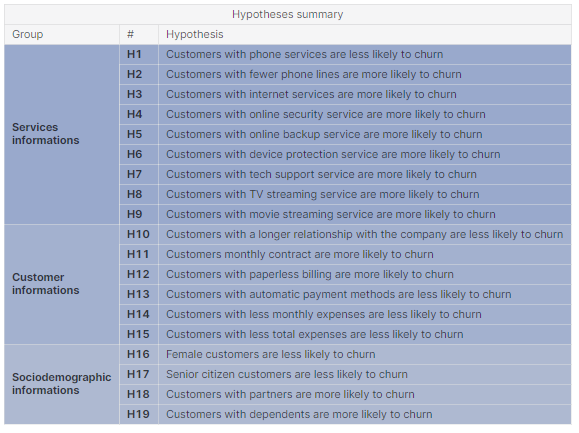

## **2. Loading Libraries and data**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

## **3. Understanding the data**

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/fendiirfan/ML_forMarketing/main/telco%20Dataset.csv')

In [70]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
type(df['TotalCharges'][0])

str

In [72]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [73]:
# check null data
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada data yang kosong

In [74]:
# Statistika deskriptif
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [75]:
custid = ['customerID']
target = ['Churn']

In [76]:
categorical = [col for col in df.columns
             if df[col].dtypes=='object']
categorical.remove(target[0])
numerical = [col for col in df.columns
             if col not in custid+target+categorical]

In [77]:
numerical

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [78]:
# for feature in df.columns:
#     if df[feature].dtype not in ['int64', 'float64']:    #dtype means datatype
#         print(df[feature].value_counts())

## One-hot encoding categorical variables

In [79]:
telco_raw = pd.get_dummies(data=df, columns=categorical, drop_first=True)

## Scaling numerical features


In [80]:
# Import StandardScaler library
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler instance
scaler = StandardScaler()
# Fit the scaler to numerical columns
scaled_numerical = scaler.fit_transform(telco_raw[numerical])
# Build a DataFrame
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)

In [81]:
scaled_numerical

,SeniorCitizen,tenure,MonthlyCharges
0,-0.439916,-1.277445,-1.160323
1,-0.439916,0.066327,-0.259629
2,-0.439916,-1.236724,-0.362660
3,-0.439916,0.514251,-0.746535
4,-0.439916,-1.236724,0.197365
...,...,...,...
7038,-0.439916,-0.340876,0.665992
7039,-0.439916,1.613701,1.277533
7040,-0.439916,-0.870241,-1.168632
7041,2.273159,-1.155283,0.320338
